# Dossier de modélisation statitique 

Quentin GENSE - Gwénaël PETIT - Anita RIVOT - Louis SOYEZ

## Description du sujet et de la base de données 

Sujet : 
Données et variables : 
Source : 

In [117]:
#Bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [119]:
#Importation des données
data = pd.read_csv("train.csv")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Statistiques univariées

### Préparation des données

In [123]:
#Liste des variables
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [171]:
#Selection des variables
df1 = data[['SalePrice', 'OverallQual','GrLivArea','GarageCars','GarageArea', 'TotalBsmtSF' ,'1stFlrSF', '2ndFlrSF', 'YearBuilt', 'YearRemodAdd',
         'Fireplaces', 'FireplaceQu', 'FullBath', 'HalfBath', 'KitchenQual', 'BsmtHalfBath','BsmtFullBath','BsmtQual', 'BsmtFinSF1', 
            'Neighborhood', 'LotArea', 'ExterQual','HouseStyle' , 'GarageYrBlt', 'YrSold', 'OpenPorchSF','EnclosedPorch','ScreenPorch','3SsnPorch', 
            'MSZoning']]
df1

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,YearBuilt,YearRemodAdd,...,LotArea,ExterQual,HouseStyle,GarageYrBlt,YrSold,OpenPorchSF,EnclosedPorch,ScreenPorch,3SsnPorch,MSZoning
0,208500,7,1710,2,548,856,856,854,2003,2003,...,8450,Gd,2Story,2003.0,2008,61,0,0,0,RL
1,181500,6,1262,2,460,1262,1262,0,1976,1976,...,9600,TA,1Story,1976.0,2007,0,0,0,0,RL
2,223500,7,1786,2,608,920,920,866,2001,2002,...,11250,Gd,2Story,2001.0,2008,42,0,0,0,RL
3,140000,7,1717,3,642,756,961,756,1915,1970,...,9550,TA,2Story,1998.0,2006,35,272,0,0,RL
4,250000,8,2198,3,836,1145,1145,1053,2000,2000,...,14260,Gd,2Story,2000.0,2008,84,0,0,0,RL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,694,1999,2000,...,7917,TA,2Story,1999.0,2007,40,0,0,0,RL
1456,210000,6,2073,2,500,1542,2073,0,1978,1988,...,13175,TA,1Story,1978.0,2010,0,0,0,0,RL
1457,266500,7,2340,1,252,1152,1188,1152,1941,2006,...,9042,Ex,2Story,1941.0,2010,60,0,0,0,RL
1458,142125,5,1078,1,240,1078,1078,0,1950,1996,...,9717,TA,1Story,1950.0,2010,0,112,0,0,RL


In [173]:
#Création de la variable NbFloors
df1['2ndFlrSF'].value_counts()
df1.loc[:, 'NbFloors'] = np.where(df['2ndFlrSF'] > 0, 1, 0)

C:\Users\quent\AppData\Local\Temp\ipykernel_2552\3086952946.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:, 'NbFloors'] = np.where(df['2ndFlrSF'] > 0, 1, 0)


In [175]:
df1

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,YearBuilt,YearRemodAdd,...,ExterQual,HouseStyle,GarageYrBlt,YrSold,OpenPorchSF,EnclosedPorch,ScreenPorch,3SsnPorch,MSZoning,NbFloors
0,208500,7,1710,2,548,856,856,854,2003,2003,...,Gd,2Story,2003.0,2008,61,0,0,0,RL,1
1,181500,6,1262,2,460,1262,1262,0,1976,1976,...,TA,1Story,1976.0,2007,0,0,0,0,RL,0
2,223500,7,1786,2,608,920,920,866,2001,2002,...,Gd,2Story,2001.0,2008,42,0,0,0,RL,1
3,140000,7,1717,3,642,756,961,756,1915,1970,...,TA,2Story,1998.0,2006,35,272,0,0,RL,1
4,250000,8,2198,3,836,1145,1145,1053,2000,2000,...,Gd,2Story,2000.0,2008,84,0,0,0,RL,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,694,1999,2000,...,TA,2Story,1999.0,2007,40,0,0,0,RL,1
1456,210000,6,2073,2,500,1542,2073,0,1978,1988,...,TA,1Story,1978.0,2010,0,0,0,0,RL,0
1457,266500,7,2340,1,252,1152,1188,1152,1941,2006,...,Ex,2Story,1941.0,2010,60,0,0,0,RL,1
1458,142125,5,1078,1,240,1078,1078,0,1950,1996,...,TA,1Story,1950.0,2010,0,112,0,0,RL,0


In [177]:
#Création de la variable TotalSF
df1['TotalSF'] = df1['1stFlrSF'] + df1['2ndFlrSF']

C:\Users\quent\AppData\Local\Temp\ipykernel_2552\364744390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalSF'] = df1['1stFlrSF'] + df1['2ndFlrSF']


In [179]:
df1

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,YearBuilt,YearRemodAdd,...,HouseStyle,GarageYrBlt,YrSold,OpenPorchSF,EnclosedPorch,ScreenPorch,3SsnPorch,MSZoning,NbFloors,TotalSF
0,208500,7,1710,2,548,856,856,854,2003,2003,...,2Story,2003.0,2008,61,0,0,0,RL,1,1710
1,181500,6,1262,2,460,1262,1262,0,1976,1976,...,1Story,1976.0,2007,0,0,0,0,RL,0,1262
2,223500,7,1786,2,608,920,920,866,2001,2002,...,2Story,2001.0,2008,42,0,0,0,RL,1,1786
3,140000,7,1717,3,642,756,961,756,1915,1970,...,2Story,1998.0,2006,35,272,0,0,RL,1,1717
4,250000,8,2198,3,836,1145,1145,1053,2000,2000,...,2Story,2000.0,2008,84,0,0,0,RL,1,2198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,694,1999,2000,...,2Story,1999.0,2007,40,0,0,0,RL,1,1647
1456,210000,6,2073,2,500,1542,2073,0,1978,1988,...,1Story,1978.0,2010,0,0,0,0,RL,0,2073
1457,266500,7,2340,1,252,1152,1188,1152,1941,2006,...,2Story,1941.0,2010,60,0,0,0,RL,1,2340
1458,142125,5,1078,1,240,1078,1078,0,1950,1996,...,1Story,1950.0,2010,0,112,0,0,RL,0,1078


In [181]:
#Création d'une variable pour caluculer l'age du bien
df1['Age'] = df1['YrSold'] - df1['YearBuilt']

C:\Users\quent\AppData\Local\Temp\ipykernel_2552\3430854747.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age'] = df1['YrSold'] - df1['YearBuilt']


In [183]:
df1

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,YearBuilt,YearRemodAdd,...,GarageYrBlt,YrSold,OpenPorchSF,EnclosedPorch,ScreenPorch,3SsnPorch,MSZoning,NbFloors,TotalSF,Age
0,208500,7,1710,2,548,856,856,854,2003,2003,...,2003.0,2008,61,0,0,0,RL,1,1710,5
1,181500,6,1262,2,460,1262,1262,0,1976,1976,...,1976.0,2007,0,0,0,0,RL,0,1262,31
2,223500,7,1786,2,608,920,920,866,2001,2002,...,2001.0,2008,42,0,0,0,RL,1,1786,7
3,140000,7,1717,3,642,756,961,756,1915,1970,...,1998.0,2006,35,272,0,0,RL,1,1717,91
4,250000,8,2198,3,836,1145,1145,1053,2000,2000,...,2000.0,2008,84,0,0,0,RL,1,2198,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,694,1999,2000,...,1999.0,2007,40,0,0,0,RL,1,1647,8
1456,210000,6,2073,2,500,1542,2073,0,1978,1988,...,1978.0,2010,0,0,0,0,RL,0,2073,32
1457,266500,7,2340,1,252,1152,1188,1152,1941,2006,...,1941.0,2010,60,0,0,0,RL,1,2340,69
1458,142125,5,1078,1,240,1078,1078,0,1950,1996,...,1950.0,2010,0,112,0,0,RL,0,1078,60


In [185]:

df1['Remodeled'] = np.where(df1['YearBuilt' != 'YearRemodAdd'])

KeyError: True

In [187]:
#Calcul de la taille totale en salle de bain
df1['TotalBath'] = df1['FullBath'] + 0.5*df1['HalfBath'] + df1['BsmtFullBath'] + 0.5*df1['BsmtHalfBath']

C:\Users\quent\AppData\Local\Temp\ipykernel_2552\907296568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalBath'] = df1['FullBath'] + 0.5*df1['HalfBath'] + df1['BsmtFullBath'] + 0.5*df1['BsmtHalfBath']


In [189]:
df1

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,YearBuilt,YearRemodAdd,...,YrSold,OpenPorchSF,EnclosedPorch,ScreenPorch,3SsnPorch,MSZoning,NbFloors,TotalSF,Age,TotalBath
0,208500,7,1710,2,548,856,856,854,2003,2003,...,2008,61,0,0,0,RL,1,1710,5,3.5
1,181500,6,1262,2,460,1262,1262,0,1976,1976,...,2007,0,0,0,0,RL,0,1262,31,2.5
2,223500,7,1786,2,608,920,920,866,2001,2002,...,2008,42,0,0,0,RL,1,1786,7,3.5
3,140000,7,1717,3,642,756,961,756,1915,1970,...,2006,35,272,0,0,RL,1,1717,91,2.0
4,250000,8,2198,3,836,1145,1145,1053,2000,2000,...,2008,84,0,0,0,RL,1,2198,8,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,694,1999,2000,...,2007,40,0,0,0,RL,1,1647,8,2.5
1456,210000,6,2073,2,500,1542,2073,0,1978,1988,...,2010,0,0,0,0,RL,0,2073,32,3.0
1457,266500,7,2340,1,252,1152,1188,1152,1941,2006,...,2010,60,0,0,0,RL,1,2340,69,2.0
1458,142125,5,1078,1,240,1078,1078,0,1950,1996,...,2010,0,112,0,0,RL,0,1078,60,2.0


In [191]:
df1['TotalPorchSF'] = df1['OpenPorchSF'] + df1['EnclosedPorch'] + df1['ScreenPorch'] + df1['3SsnPorch']
df1

C:\Users\quent\AppData\Local\Temp\ipykernel_2552\2082817693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalPorchSF'] = df1['OpenPorchSF'] + df1['EnclosedPorch'] + df1['ScreenPorch'] + df1['3SsnPorch']


,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,YearBuilt,YearRemodAdd,...,OpenPorchSF,EnclosedPorch,ScreenPorch,3SsnPorch,MSZoning,NbFloors,TotalSF,Age,TotalBath,TotalPorchSF
0,208500,7,1710,2,548,856,856,854,2003,2003,...,61,0,0,0,RL,1,1710,5,3.5,61
1,181500,6,1262,2,460,1262,1262,0,1976,1976,...,0,0,0,0,RL,0,1262,31,2.5,0
2,223500,7,1786,2,608,920,920,866,2001,2002,...,42,0,0,0,RL,1,1786,7,3.5,42
3,140000,7,1717,3,642,756,961,756,1915,1970,...,35,272,0,0,RL,1,1717,91,2.0,307
4,250000,8,2198,3,836,1145,1145,1053,2000,2000,...,84,0,0,0,RL,1,2198,8,3.5,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,694,1999,2000,...,40,0,0,0,RL,1,1647,8,2.5,40
1456,210000,6,2073,2,500,1542,2073,0,1978,1988,...,0,0,0,0,RL,0,2073,32,3.0,0
1457,266500,7,2340,1,252,1152,1188,1152,1941,2006,...,60,0,0,0,RL,1,2340,69,2.0,60
1458,142125,5,1078,1,240,1078,1078,0,1950,1996,...,0,112,0,0,RL,0,1078,60,2.0,112


SalePrice          0
OverallQual        0
GrLivArea          0
GarageCars         0
GarageArea         0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
YearBuilt          0
YearRemodAdd       0
Fireplaces         0
FireplaceQu      690
FullBath           0
HalfBath           0
KitchenQual        0
BsmtHalfBath       0
BsmtFullBath       0
BsmtQual          37
BsmtFinSF1         0
Neighborhood       0
LotArea            0
ExterQual          0
HouseStyle         0
GarageYrBlt       81
YrSold             0
OpenPorchSF        0
EnclosedPorch      0
ScreenPorch        0
3SsnPorch          0
MSZoning           0
NbFloors           0
TotalSF            0
Age                0
TotalBath          0
TotalPorchSF       0
dtype: int64

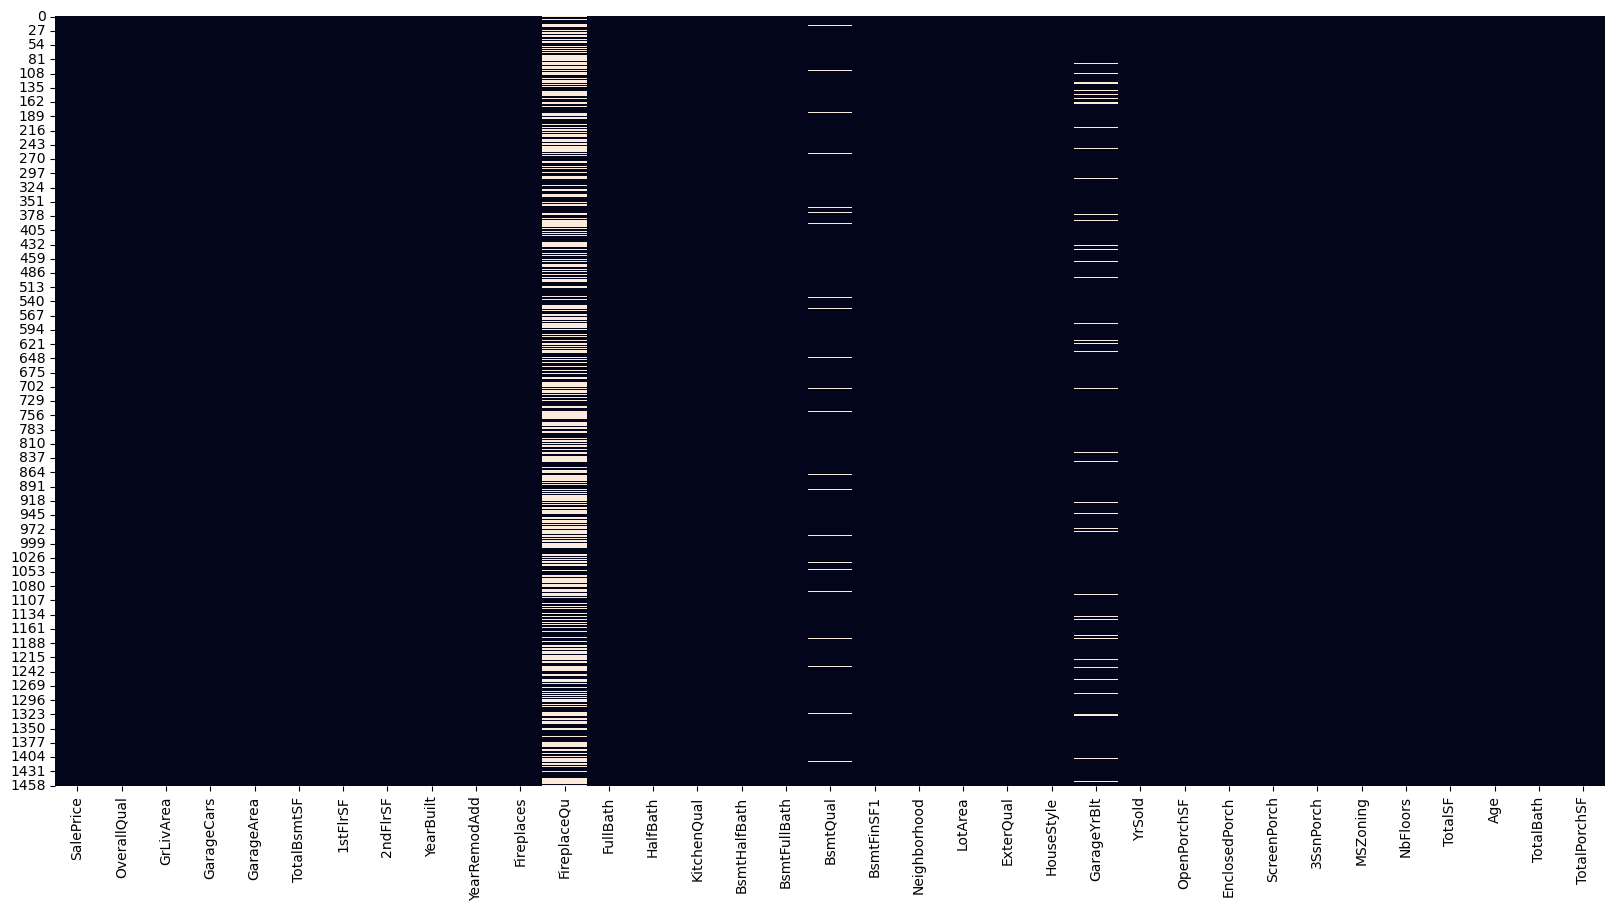

In [193]:
#identification des valeurs manquantes
plt.figure(figsize=(20,10))
sns.heatmap(df1.isna(), cbar=False)
df1.isnull().sum()

In [195]:
#identification des types 
df1.dtypes.value_counts()

int64      25
object      7
float64     2
int32       1
Name: count, dtype: int64

### Variables Quantitatives

- SalePrice : prix de vente en $ (variable cible)
- LotArea : Taille du terrain en pieds carrés
- YearBuilt : Année de construction
- TotRmsAbvGrd : Nombre de pièces hors salles de bain
- TotalSF : nombre total de squarefeet
- NbFloors : nombre d'étages

C:\Users\quent\anaconda3\Lib\site-packages\seaborn\axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


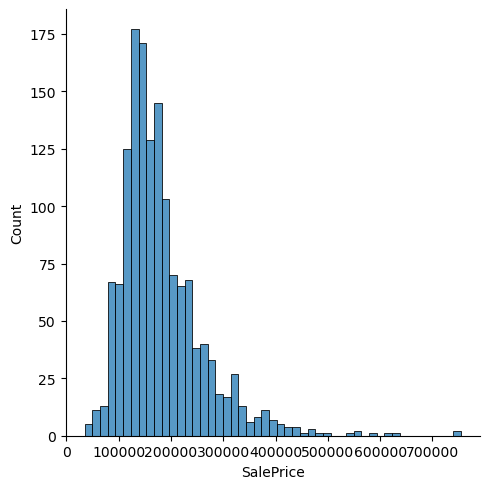

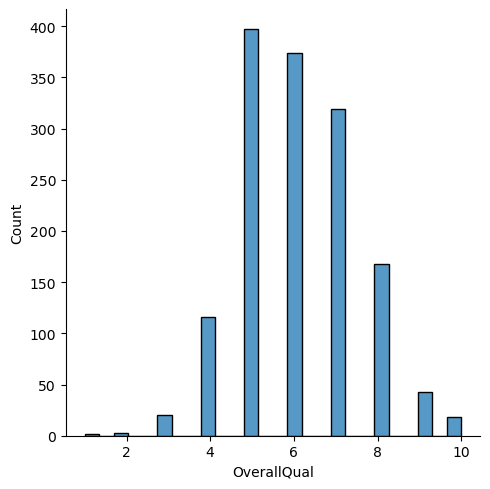

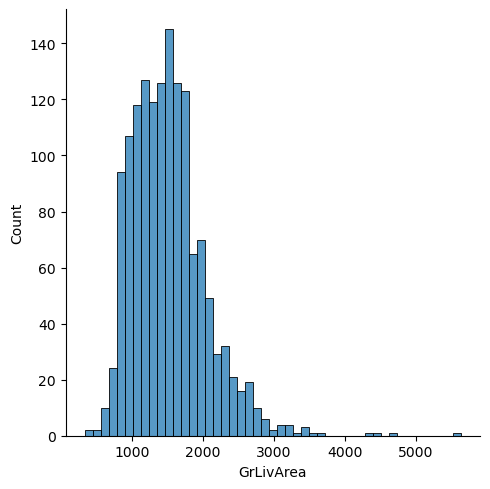

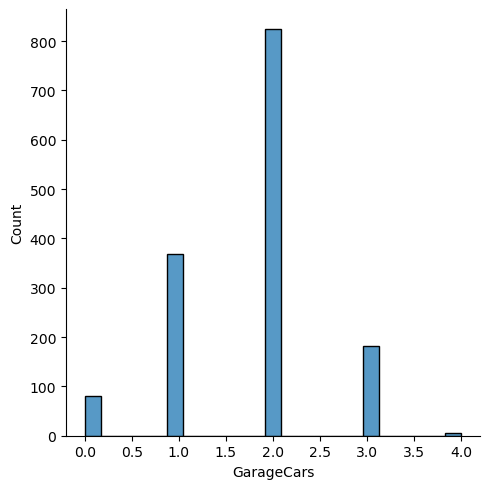

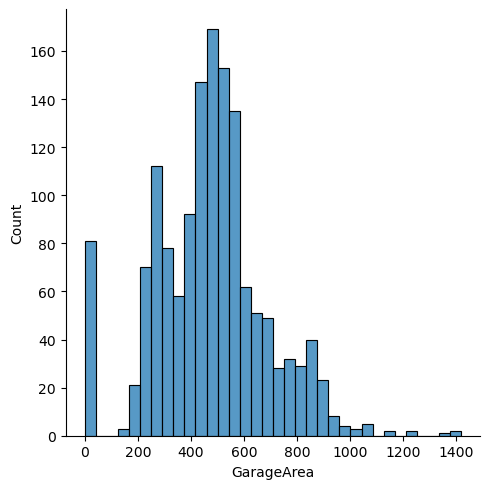

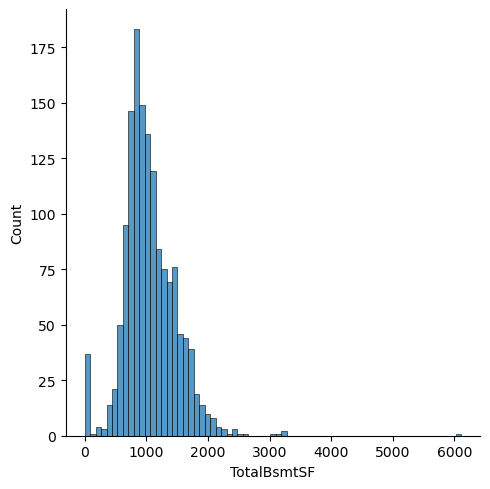

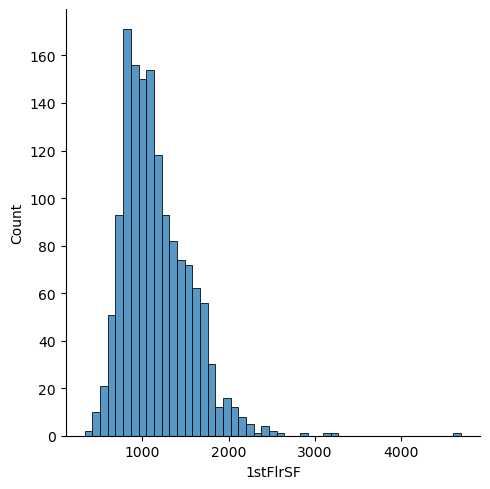

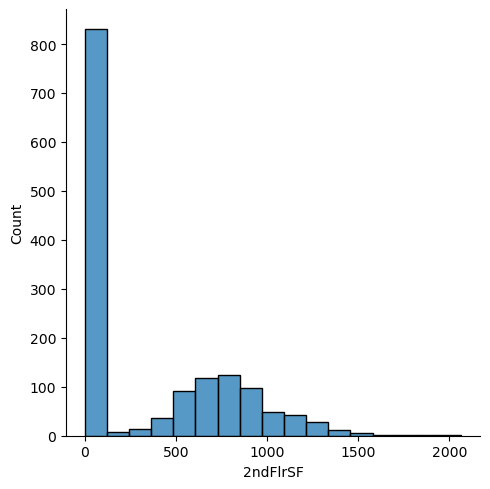

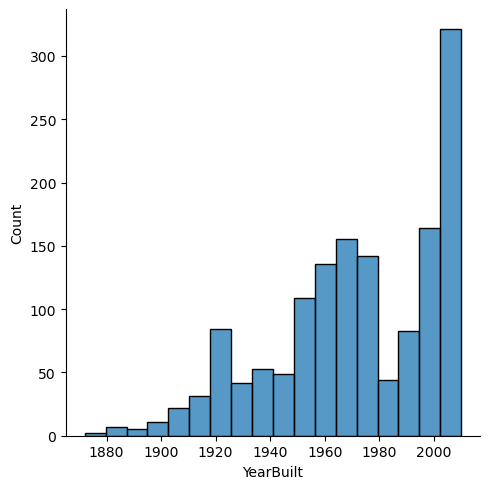

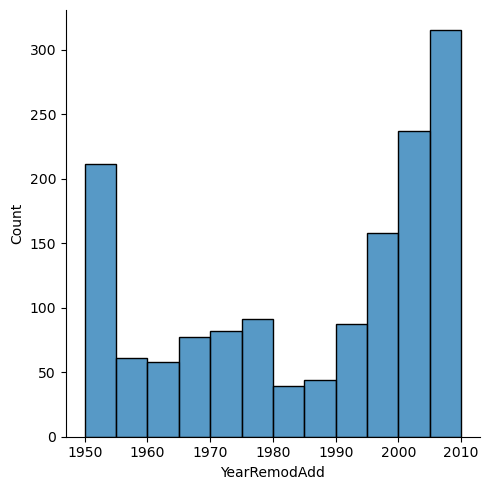

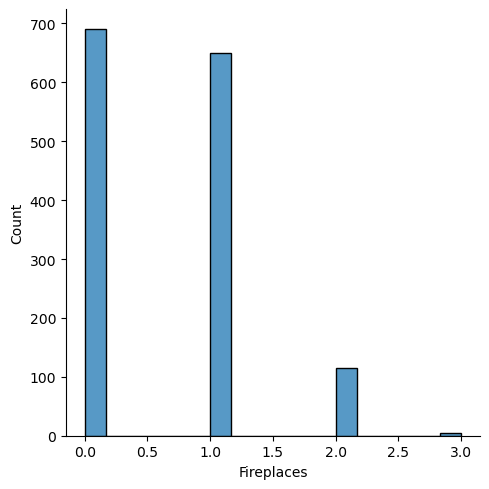

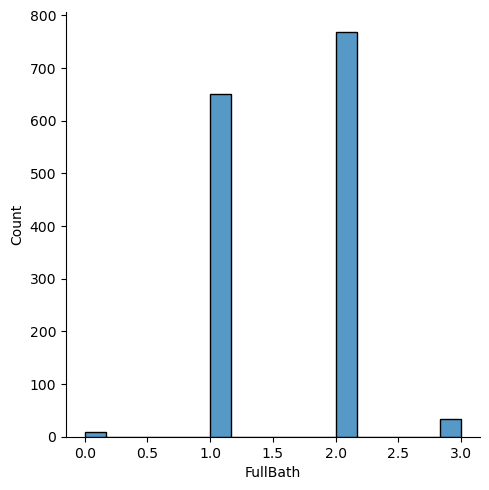

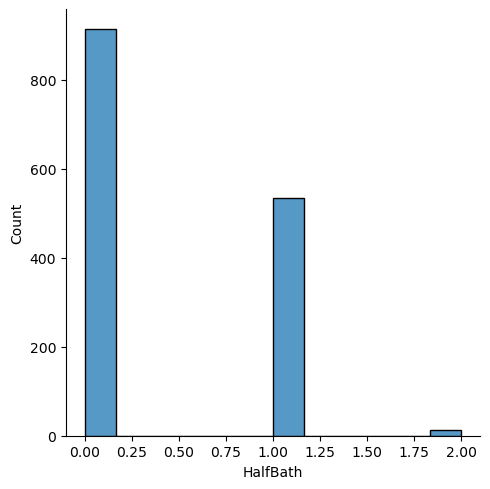

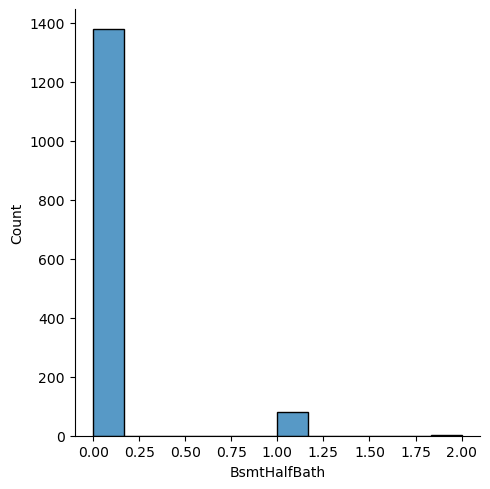

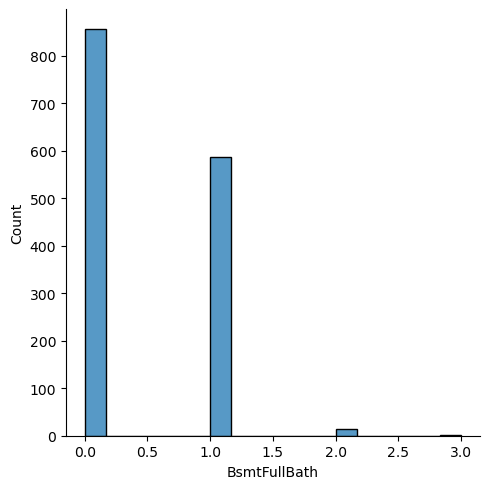

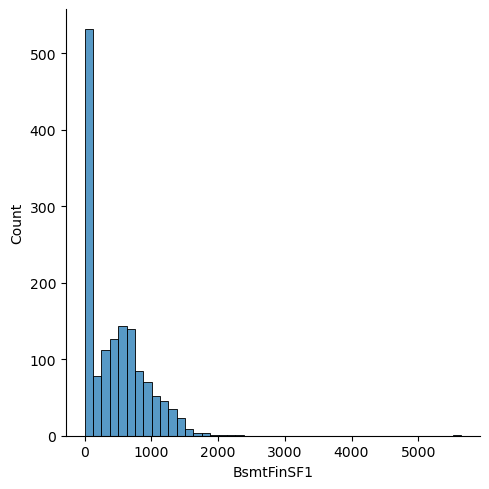

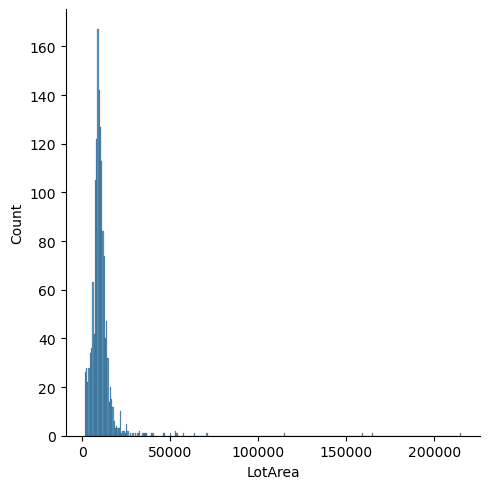

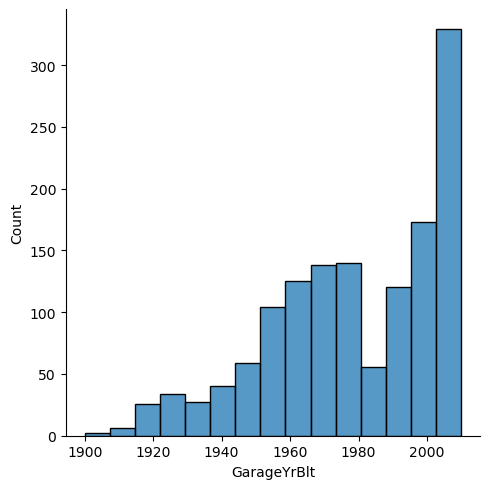

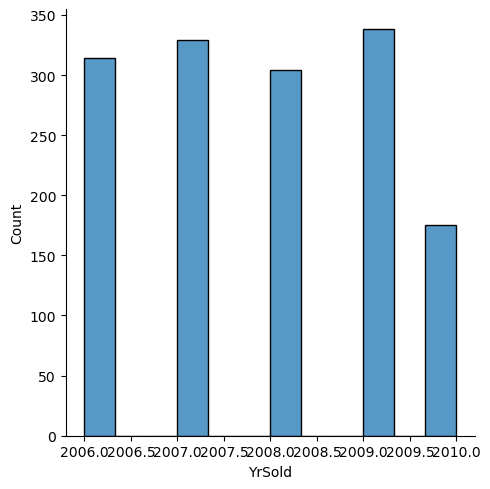

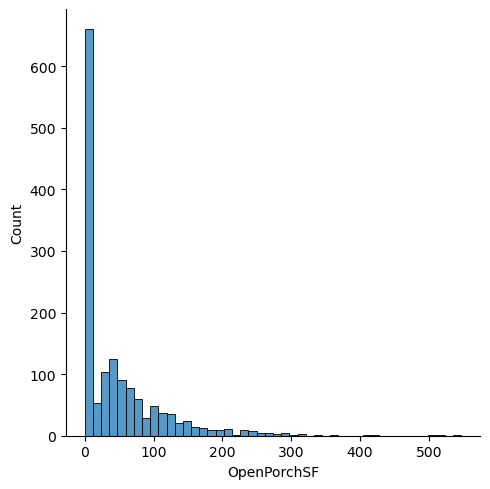

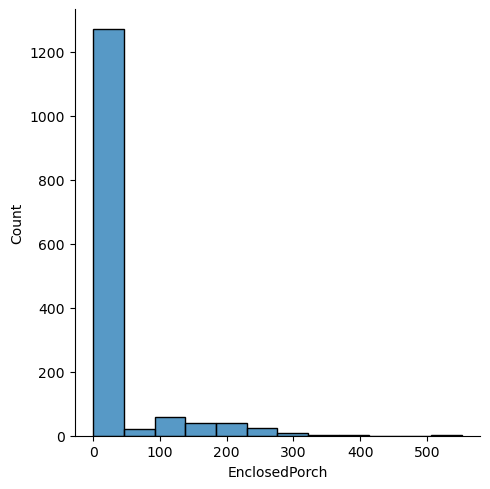

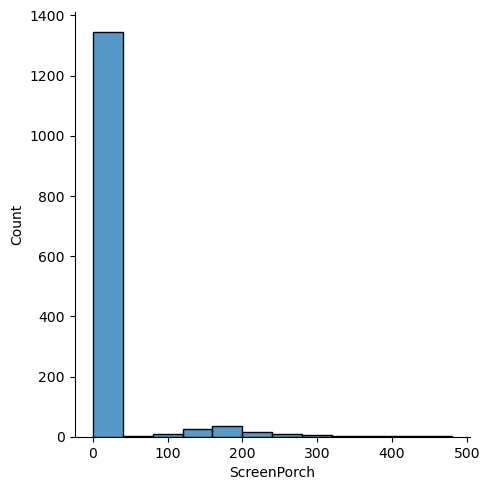

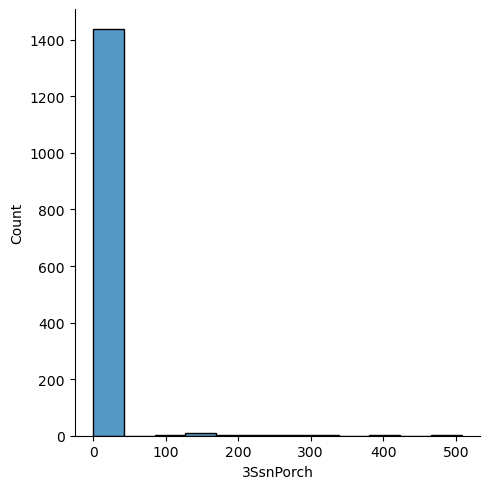

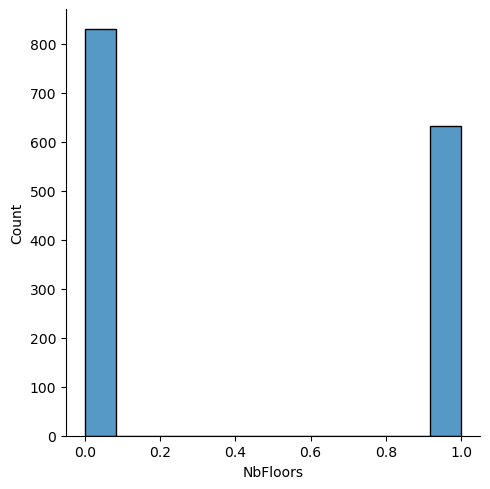

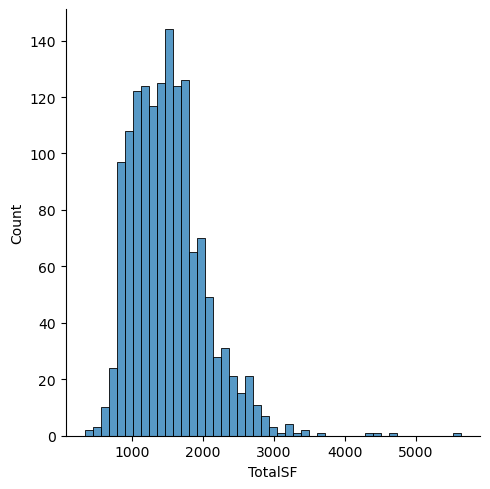

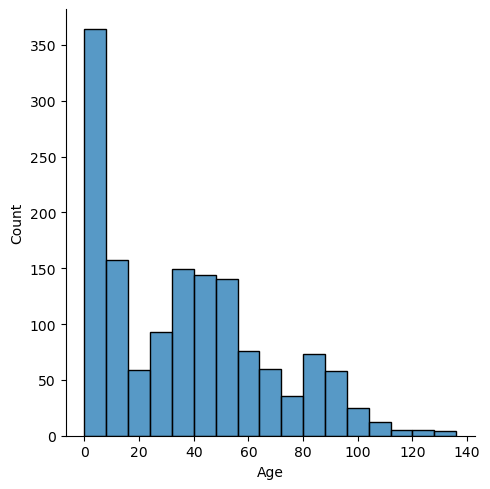

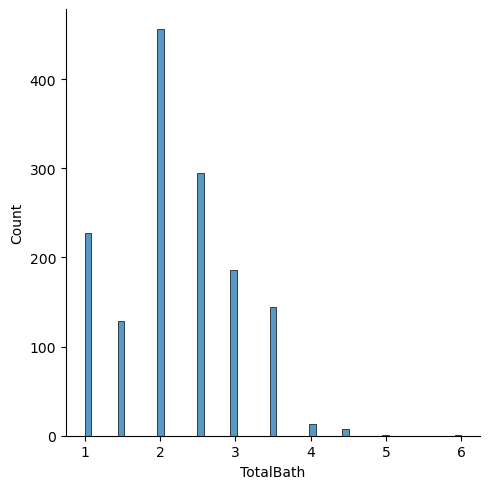

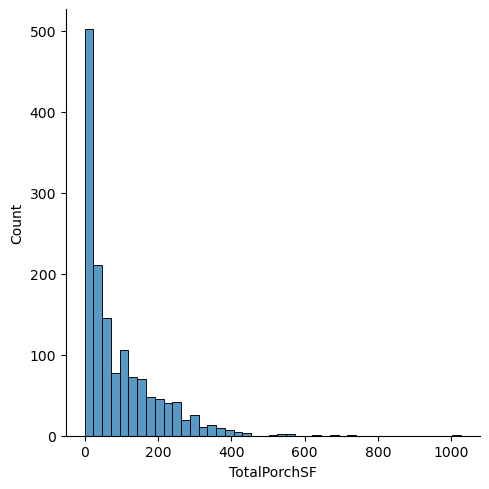

In [199]:
for col in df1.select_dtypes(['float', 'int']):
    sns.displot(df1[col])

#### Target

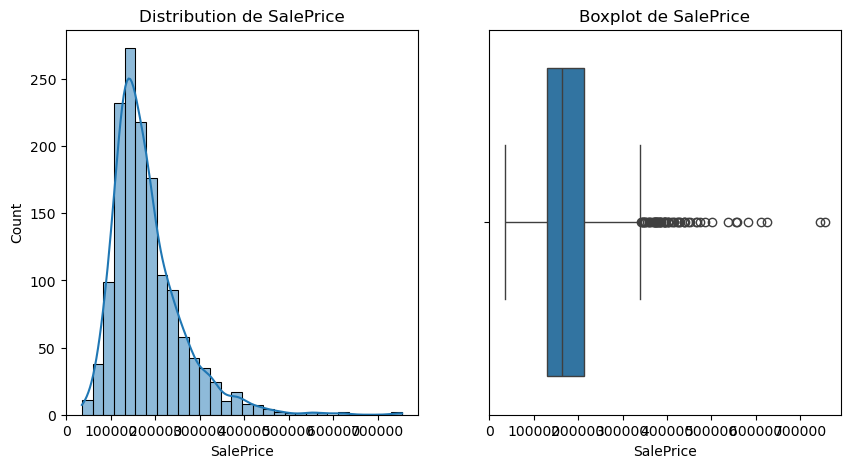

In [201]:
#Représentation graphique de la variable SalePrice
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Distribution de SalePrice")
sns.histplot(df1['SalePrice'], kde=True, bins=30)
plt.subplot(1,2,2)
plt.title("Boxplot de SalePrice")
sns.boxplot(x=df['SalePrice'])
plt.show()

In [202]:
#SalePrice : Variable cible
##Indicateurs de position
###Moyenne
print("moyenne :",df1['SalePrice'].mean())
###Médiane
print("médiane :",df1['SalePrice'].median())
###Mode
print("mode :",df1['SalePrice'].mode())
###Quantiles
print("Q1 :",df1['SalePrice'].quantile(0.25))
print("Q2 :",df1['SalePrice'].quantile(0.5))
print("Q3 :",df1['SalePrice'].quantile(0.75))

moyenne : 180921.19589041095
médiane : 163000.0
mode : 0    140000
Name: SalePrice, dtype: int64
Q1 : 129975.0
Q2 : 163000.0
Q3 : 214000.0


In [206]:
##Indicateurs de dispersion
###Variance
print("variance :",df1['SalePrice'].var())
###Ecart-type
print("écart-type :",df1['SalePrice'].std())
###Coefficient de variation
print("coefficient de variation :",df1['SalePrice'].std()/df1['SalePrice'].mean())
###Intervalle interquartile
print("intervalle interquartile :",df1['SalePrice'].quantile(0.75)-df['SalePrice'].quantile(0.25))

variance : 6311111264.297451
écart-type : 79442.50288288663
coefficient de variation : 0.4391000318780072
intervalle interquartile : 84025.0


In [208]:
##Indicateurs de forme
###Asymétrie
print("asymétrie :",df1['SalePrice'].skew())
###Aplatissement
print("aplatissement :",df1['SalePrice'].kurtosis())

asymétrie : 1.8828757597682129
aplatissement : 6.536281860064529


Il y a une asymétrie à droite, et le coefficient d'applatissement indique que la distribution est plus "pointue" que la loi normale autrement dit qu'il ya une forte concentration des données autour de la moyenne ou qu'il y a plus d'outliers que dans une distribution normale : ce que l'on peut observer sur les deux représentations graphiques.

#### Features

### Variables qualitatives

- MSZoning : classification de la zone 
- OverallCond : évalue l'état général de la maison
- CentralAir : existance d'une système de climatisation
- Pool : existance d'une piscine

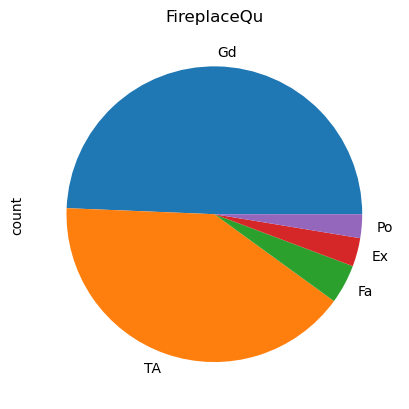

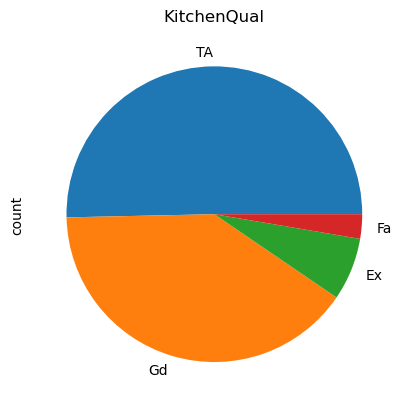

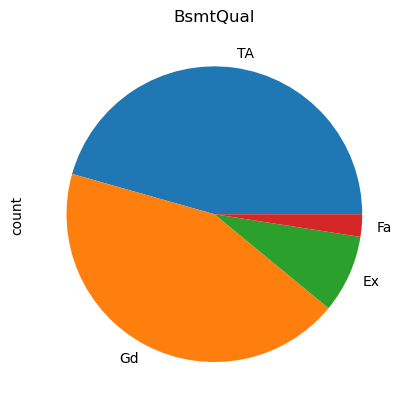

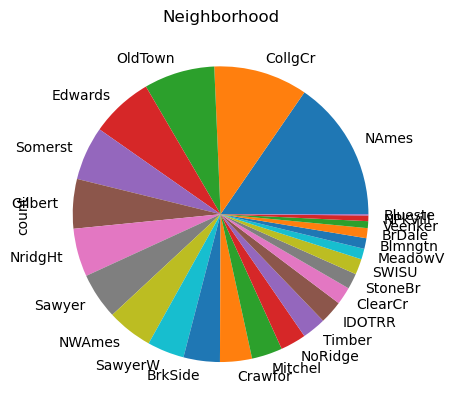

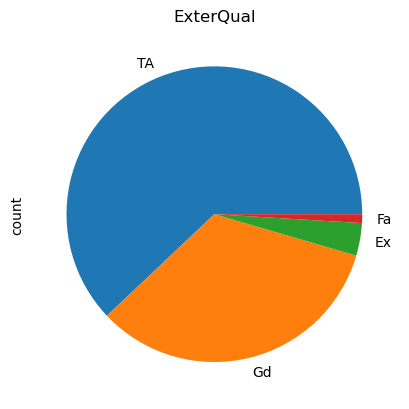

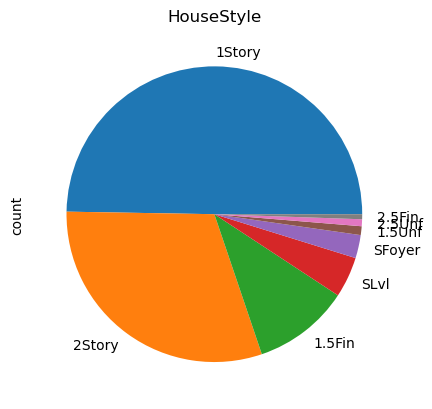

In [155]:
for col in df1.select_dtypes('object'):
    plt.figure()
    df1[col].value_counts().plot.pie()
    plt.title(col)

Effectifs :  FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64
Pourcentage :  FireplaceQu
Gd    49.350649
TA    40.649351
Fa     4.285714
Ex     3.116883
Po     2.597403
Name: proportion, dtype: float64
Mode :  0    Gd
Name: FireplaceQu, dtype: object


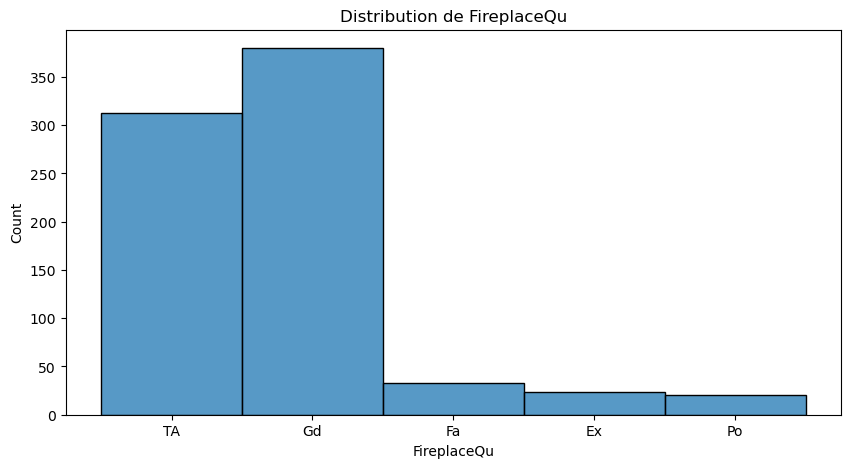

Effectifs :  KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64
Pourcentage :  KitchenQual
TA    50.342466
Gd    40.136986
Ex     6.849315
Fa     2.671233
Name: proportion, dtype: float64
Mode :  0    TA
Name: KitchenQual, dtype: object


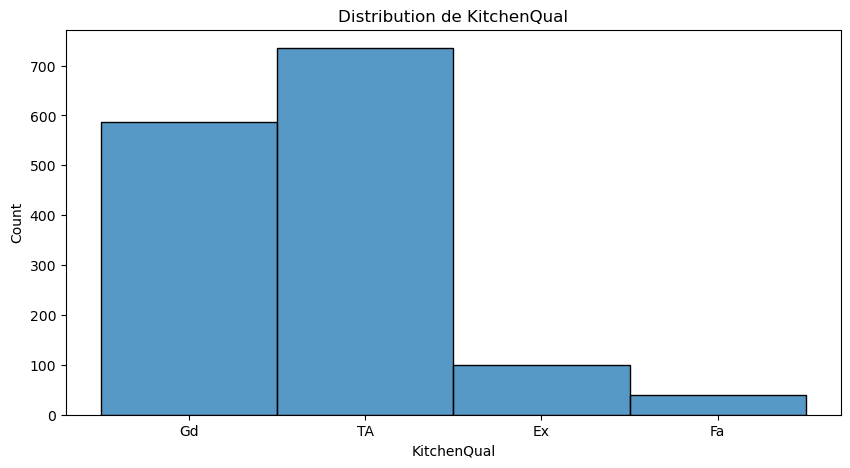

Effectifs :  BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64
Pourcentage :  BsmtQual
TA    45.607871
Gd    43.429375
Ex     8.503162
Fa     2.459592
Name: proportion, dtype: float64
Mode :  0    TA
Name: BsmtQual, dtype: object


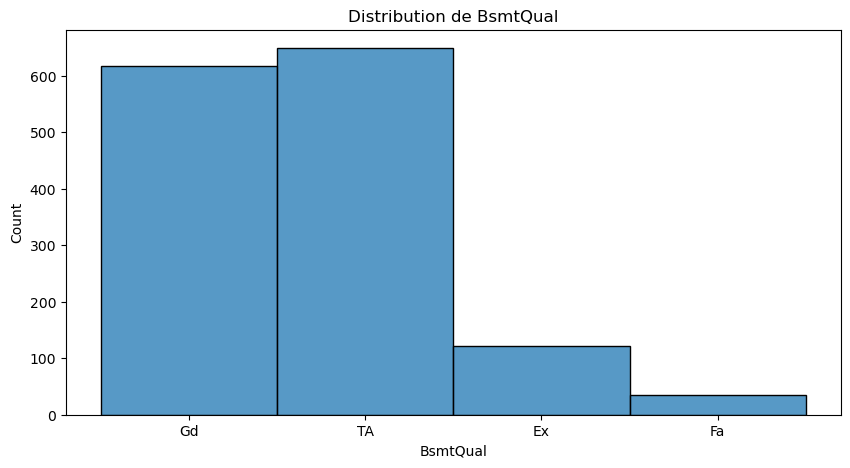

Effectifs :  Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64
Pourcentage :  Neighborhood
NAmes      15.410959
CollgCr    10.273973
OldTown     7.739726
Edwards     6.849315
Somerst     5.890411
Gilbert     5.410959
NridgHt     5.273973
Sawyer      5.068493
NWAmes      5.000000
SawyerW     4.041096
BrkSide     3.972603
Crawfor     3.493151
Mitchel     3.356164
NoRidge     2.808219
Timber      2.602740
IDOTRR      2.534247
ClearCr     1.917808
StoneBr     1.712329
SWISU       1.712329
MeadowV     1.164384
Blmngtn     1.164384
BrDale      1.095890
Veenker     0.753425
NPkVill     0.616438
Blueste     0.136986
Name: proportion, dt

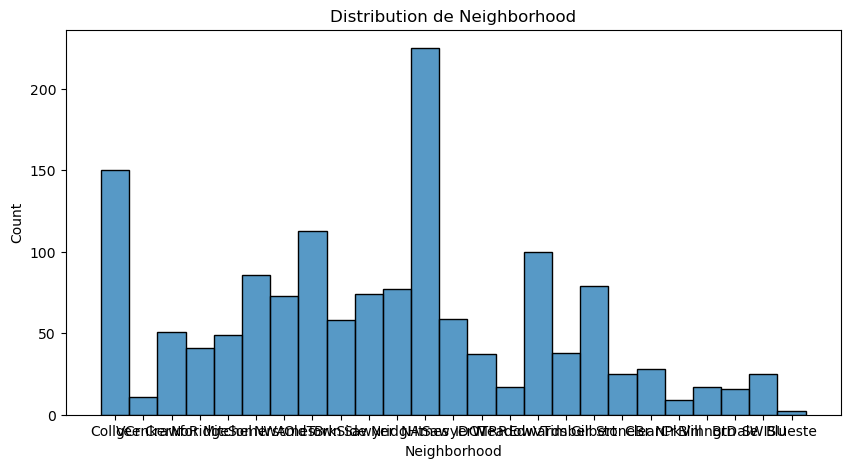

Effectifs :  ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64
Pourcentage :  ExterQual
TA    62.054795
Gd    33.424658
Ex     3.561644
Fa     0.958904
Name: proportion, dtype: float64
Mode :  0    TA
Name: ExterQual, dtype: object


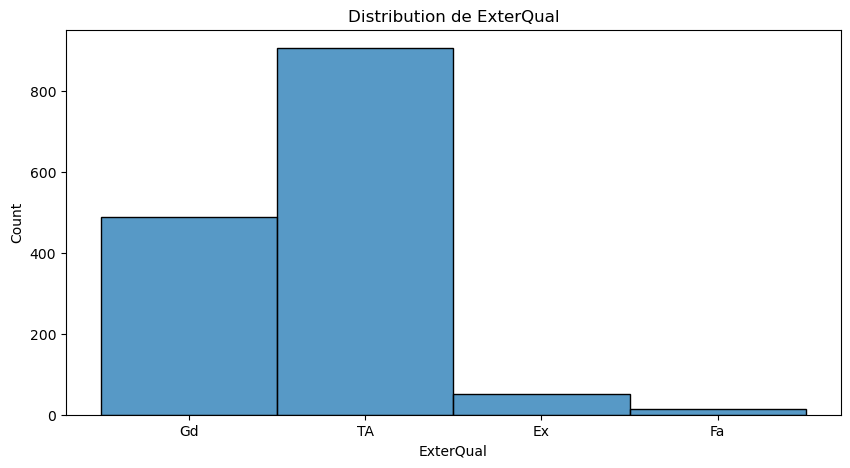

Effectifs :  HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64
Pourcentage :  HouseStyle
1Story    49.726027
2Story    30.479452
1.5Fin    10.547945
SLvl       4.452055
SFoyer     2.534247
1.5Unf     0.958904
2.5Unf     0.753425
2.5Fin     0.547945
Name: proportion, dtype: float64
Mode :  0    1Story
Name: HouseStyle, dtype: object


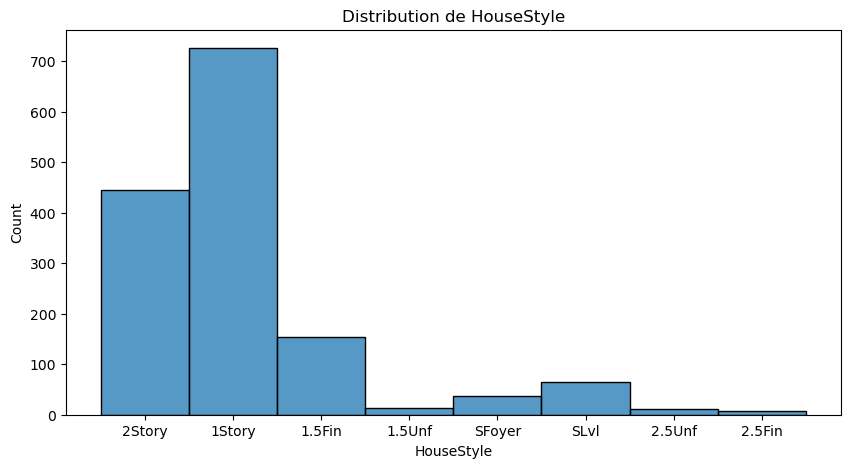

Effectifs :  MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
Pourcentage :  MSZoning
RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: proportion, dtype: float64
Mode :  0    RL
Name: MSZoning, dtype: object


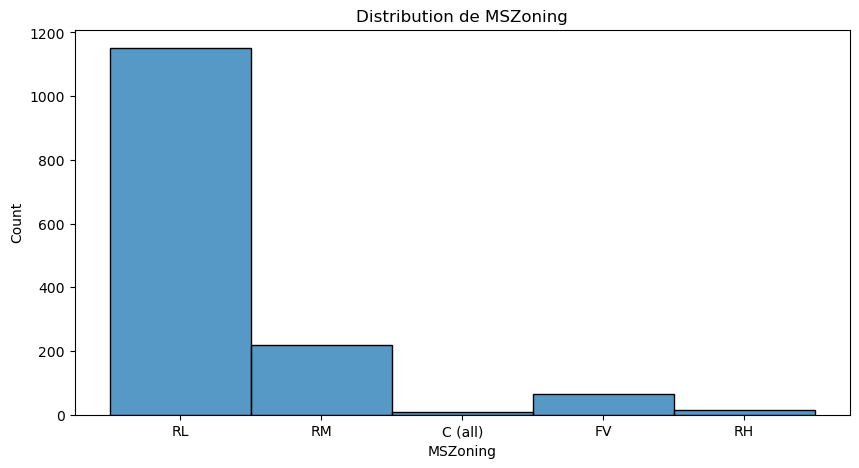

In [210]:
for col in df1.select_dtypes('object'):
    ##Effectif
    print("Effectifs : ",df1[col].value_counts())
    ##Pourcentage
    print("Pourcentage : ",df1[col].value_counts(normalize=True)*100)
    ##Mode
    print("Mode : ",df1[col].mode())
    ##Répartition
    plt.figure(figsize=(10,5)) 
    plt.title(f"Distribution de {col}")
    sns.histplot(df1[col], bins=30)
    plt.show()

Effectifs :  OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: count, dtype: int64
Pourcentage :  OverallQual
5     27.191781
6     25.616438
7     21.849315
8     11.506849
4      7.945205
9      2.945205
3      1.369863
10     1.232877
2      0.205479
1      0.136986
Name: proportion, dtype: float64
Mode :  0    5
Name: OverallQual, dtype: int64


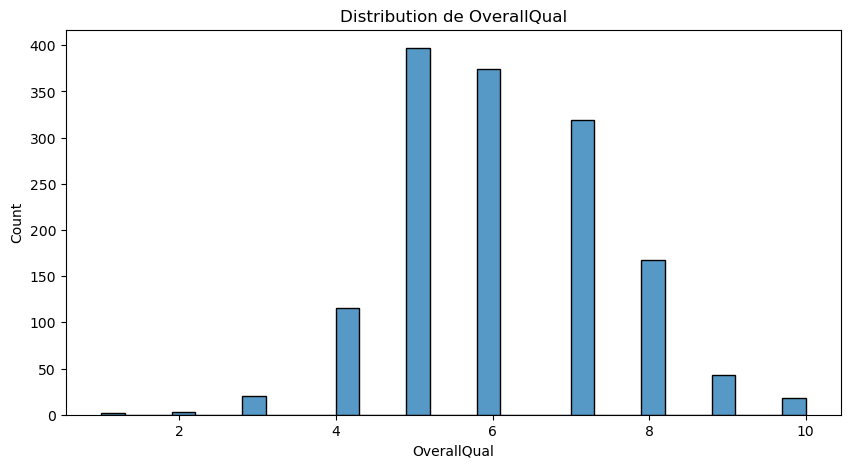

In [169]:
#Variable OverallQual
##Effectif
print("Effectifs : ",df1['OverallQual'].value_counts())
##Pourcentage
print("Pourcentage : ",df1['OverallQual'].value_counts(normalize=True)*100)
##Mode
print("Mode : ",df1['OverallQual'].mode())
##Répartition
plt.figure(figsize=(10,5))
plt.title("Distribution de OverallQual")
sns.histplot(df1['OverallQual'], bins=30)
plt.show()

## Statistiques Bivariées

## Tests Statistiques 

In [ ]:
#Test de loi


## Modélisation

### Splitting

In [ ]:
#Splitting


In [ ]:
#Test de représentativité de l'échantillon
